Training Accuracy: 0.8321428571428572
Testing Accuracy: 0.85
Confusion Matrix:
 [[71  2]
 [16 31]]


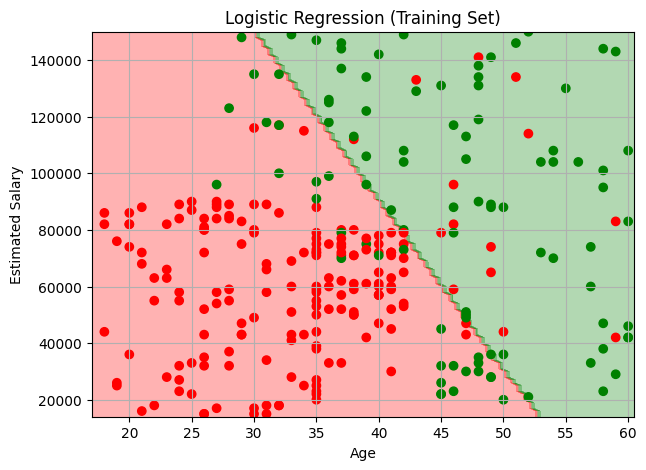

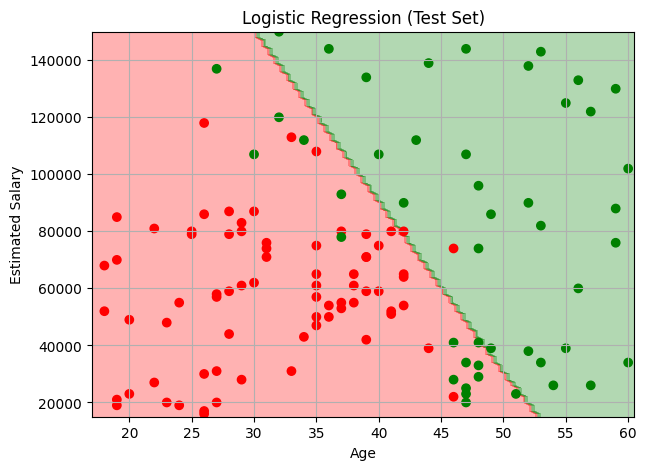

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data=pd.read_csv('/content/data (2).csv')
x=data[['Age','EstimatedSalary']].values
y=data['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

print('Training Accuracy:',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy:',accuracy_score(y_test,y_test_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))

new_x=np.array([[35,50000]])
predicted_class=model.predict(new_x)
pred_prob=model.predict_proba(new_x)

from matplotlib.colors import ListedColormap

plt.figure(figsize=(7,5))
x_set,y_set=x_train,y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.5),
    np.arange(start=x_set[:,1].min()-1000, stop=x_set[:,1].max()+1000,step=1000)
)
plt.contourf(x1, x2,model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.scatter(x_set[:,0], x_set[:,1], c=y_set, cmap=ListedColormap(('red','green')))
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Logistic Regression (Training Set)")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
x_set,y_set=x_test,y_test
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.5),
    np.arange(start = x_set[:, 1].min()-1000, stop = x_set[:, 1].max() + 1000, step = 1000)
)
plt.contourf(x1, x2,model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.scatter(x_set[:,0], x_set[:,1], c=y_set, cmap=ListedColormap(('red','green')))
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Logistic Regression (Test Set)")
plt.grid(True)
plt.show()

